# Convolutional Neural Network


## Importing Libraries


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Data Preprocessing


### Preprocessing the Training set


Found 8000 files belonging to 2 classes.


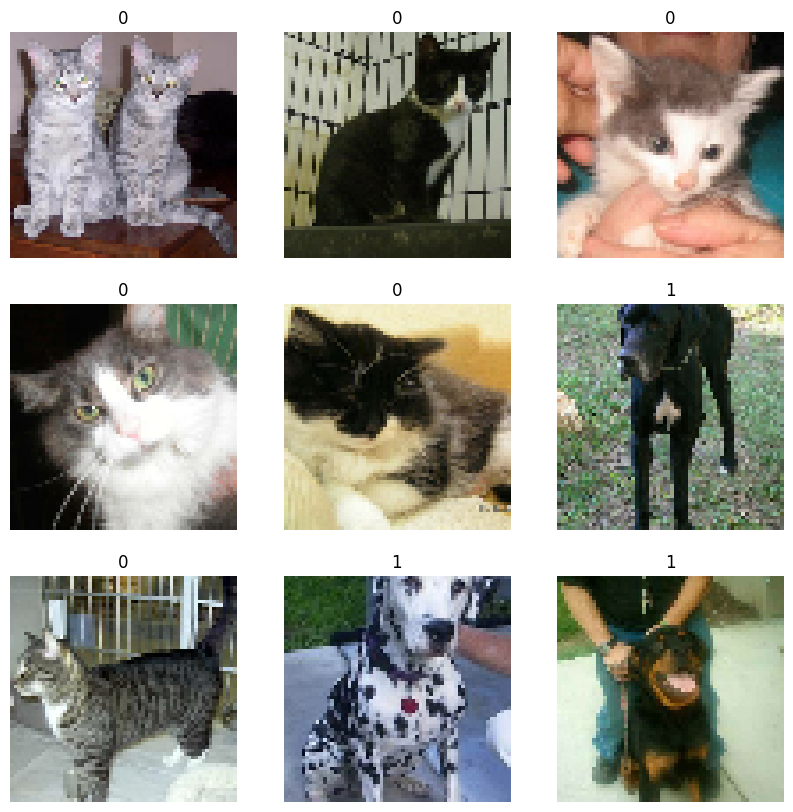

In [2]:
# If we don't apply transformations on images we will get overfitting
# We will apply to thee training set only, we will get huge difference on
# test set and training set accuracies
# Some simple geometrical transformations so as to modify the images to get them augmented
# Image Augmentation
from random import shuffle
from keras.utils import image_dataset_from_directory
from sklearn.model_selection import ShuffleSplit

# Data augmentation and preprocessing
train_ds = image_dataset_from_directory(
    "../../datasets/images_dataset/training_set",
    batch_size=32,
    labels="inferred",
    image_size=(64, 64),
    crop_to_aspect_ratio=True,
    shuffle=True,
    seed=1337,
    verbose=True,
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Preprocessing the Test set


Found 2000 files belonging to 2 classes.


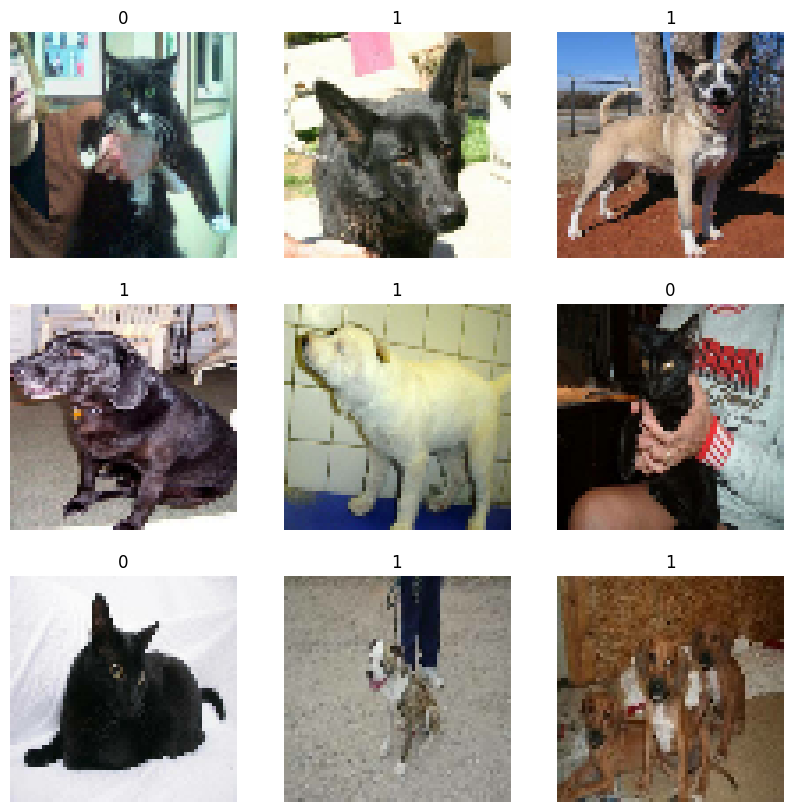

In [3]:
test_ds = image_dataset_from_directory(
    "../datasets/images_dataset/test_set",
    labels="inferred",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=1337,
    verbose=True,
)

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Image Augmentation and Normalizing


In [4]:
from turtle import position
from keras_cv.layers import RandomShear


image_height = 64
max_shear_angle = 0.2
max_shift = max_shear_angle * image_height

layers = [
    tf.keras.layers.RandomZoom(height_factor=(0.8, 1.0), width_factor=(0.8, 1.0)),
    # tf.keras.layers.RandomTranslation(
    #     height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)
    # ),
    tf.keras.layers.RandomContrast(factor=0.2),
    # tf.keras.layers.RandomBrightness(factor=0.2),
    # tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.Rescaling(1.0 / 255),
]


def data_augmentation(images):
    for layer in layers:
        images = layer(images)
    return images

c:\Users\cmsha\venv\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


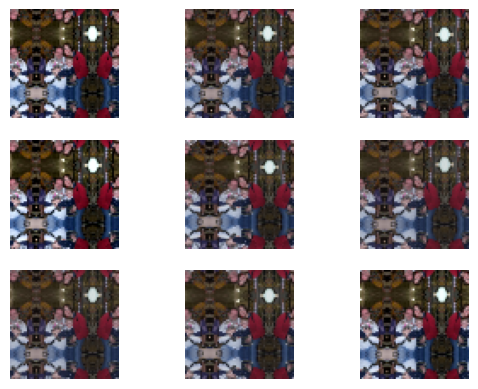

In [5]:
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0] * 255).astype("uint8"))
        plt.axis("off")

In [6]:
train_ds = train_ds.map(
    lambda img, label: (
        data_augmentation(img),
        label,
    ),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

for image, _ in train_ds.take(1):
    print(image)

tf.Tensor(
[[[[0.8169494  0.75602055 0.77019095]
   [0.789843   0.76017416 0.7140531 ]
   [0.8182595  0.8205272  0.75287807]
   ...
   [0.27869    0.26908383 0.29576826]
   [0.30452743 0.28502572 0.31251824]
   [0.42484447 0.3913981  0.41253674]]

  [[0.7732864  0.72148454 0.7146079 ]
   [0.7886168  0.7212073  0.7421634 ]
   [0.65368545 0.60380197 0.6281764 ]
   ...
   [0.41491663 0.4067873  0.4582521 ]
   [0.37424052 0.37194058 0.3989399 ]
   [0.33650976 0.3312087  0.36011603]]

  [[0.7069427  0.6789911  0.6742907 ]
   [0.715579   0.6641239  0.656089  ]
   [0.6891035  0.63469166 0.64432245]
   ...
   [0.43779594 0.43119535 0.4901697 ]
   [0.40285945 0.3940515  0.46216935]
   [0.36605188 0.3545871  0.4172571 ]]

  ...

  [[0.71187985 0.66468006 0.67708427]
   [0.51155984 0.4631245  0.46651003]
   [0.57220465 0.5092113  0.51510257]
   ...
   [0.47786605 0.4465735  0.47166732]
   [0.32893142 0.30103832 0.3411037 ]
   [0.52811617 0.5030862  0.5319054 ]]

  [[0.437024   0.37293592 0.411279

## Part 2: Building the CNN


### Initialising the CNN


In [7]:
cnn = tf.keras.Sequential()  # initializes our ann as a sequence of layers

### Step 1 - Convolution


In [8]:
cnn.add(tf.keras.layers.Input(shape=(64, 64, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
# filters are the number of feature detectors
# the kernel size is the size of the feature detector
# input shape is the size and color channels added only on the first layer

### Step 2 - Pooling


In [9]:
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2,
    )
)

### Adding a Second Convolutional Layer


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2,
    )
)

### Step 3 - Flattening


In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection


In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 5 - Output Layer


In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

## Part 3: Training the CNN


### Compiling the CNN


In [15]:
cnn.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)  # for non-binary the loss is categorical_crossentropy

### Training the ANN on the Training set and Evalutaing it on the Test set


In [16]:
cnn.fit(train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25


250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.5776 - loss: 0.6712 - val_accuracy: 0.5370 - val_loss: 65.6915
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6833 - loss: 0.5926 - val_accuracy: 0.5650 - val_loss: 79.2095
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7366 - loss: 0.5338 - val_accuracy: 0.5635 - val_loss: 79.3844
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7612 - loss: 0.4983 - val_accuracy: 0.5720 - val_loss: 98.9679
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7729 - loss: 0.4725 - val_accuracy: 0.5620 - val_loss: 135.6631
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7904 - loss: 0.4466 - val_accuracy: 0.6105 - val_loss: 70.8302
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8111 - loss: 0.4179 - val_accuracy: 0.5460 - val_loss: 163.9720
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8289 - loss: 0.3739 - va

## Part 4: Making a Single Prediction


In [18]:
from unittest import result
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(
    "../datasets/single_prediction/cat.jpg", target_size=(64, 64)
)
# This is currently a PIL image format into a 2D array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(
    test_image, axis=0
)  # add batch size which is aways the first
result = cnn.predict(test_image)
# class_names = train_ds.class_names
# print(class_names)

if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
cat
